### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('ricci_boltztrap_mp_tabular_merged_with_NaN_v2_bandgap.pkl')

# Define features and target variable
features = joblib.load('features_v2.pkl')
print('No. of features', len(features))

df.head()

No. of features 2497


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,κₑᵉ.n.T [K],κₑᵉ.n.c [cm⁻³],mₑᶜ.p.ε̄ [mₑ],mₑᶜ.p.ε₁ [mₑ],mₑᶜ.p.ε₂ [mₑ],mₑᶜ.p.ε₃ [mₑ],mₑᶜ.n.ε̄ [mₑ],mₑᶜ.n.ε₁ [mₑ],mₑᶜ.n.ε₂ [mₑ],mₑᶜ.n.ε₃ [mₑ]
mp-27502,0.0,0.0,0.0,0.0,1,0.088829,0.016742,0.0,0.0,0.0,...,100.0,1.000000e+16,9.948649,3.481600,5.835956,20.528390,0.990398,0.581862,1.084788,1.304544
mp-770629,0.0,0.0,0.0,0.0,1,0.779730,0.171021,0.0,0.0,0.0,...,100.0,1.000000e+16,10.016446,7.157813,8.633919,14.257605,3.746585,1.077907,4.539832,5.622017
mp-27202,0.0,0.0,0.0,0.0,0,0.070306,0.004246,0.0,0.0,0.0,...,600.0,1.000000e+16,25.742400,17.822069,20.141565,39.263564,19.824545,15.836995,18.160493,25.476146
mp-559608,0.0,0.0,0.0,0.0,1,0.820234,0.145225,0.0,0.0,0.0,...,100.0,1.000000e+16,91.371212,61.389242,61.389279,151.335114,0.492688,0.485241,0.485241,0.507582
mp-755789,0.0,0.0,0.0,0.0,1,0.792998,0.176412,0.0,0.0,0.0,...,100.0,1.000000e+16,2186.118835,0.765132,186.112239,6371.479133,0.556754,0.481390,0.538433,0.650440


In [3]:
target = 'ΔE [eV]' #bandgap

## Limit the range of interest - considering the inherent error of DFT of such a magnitude, avoid those near zero band gap
df = df[df[target]>0.2] 

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

ΔE [eV]
Max value: 17.90230219634743
Min value: 0.20019415105802002


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\6. ricci_boltztrap_mp_tabular (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/ΔE [eV]_results/df_test_ΔE [eV].pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/ΔE [eV]_results/df_test_ΔE [eV]_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'ΔE [eV]'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_v2.pkl'

problem = 'regression'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  ΔE [eV]
No. of exploratory features:  2497


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 19128
   Metric score:  -0.53409
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 19128
   Metric score:  -0.66845


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 19128
   Metric score:  -0.53367
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 19128
   Metric score:  -0.57355


   (5 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 40)]
   No. o

LGBMRegressor(importance_type='gain', learning_rate=0.2, n_estimators=300,
              num_leaves=50, objective='regression')

Result saved as: feature_relevance_score_ΔE [eV].pkl
Figure saved as: feature_relevance_plot_ΔE [eV].png


,feature,relevance_score
0,frac_d_valence_electrons,29297.225090
1,transition_metal_fraction,7229.895348
2,HOMO_energy,6187.823371
3,DemlData_mean_first_ioniz,4130.360845
4,jml_ndvalence,3225.970550
...,...,...
2492,jml_C13,0.000000
2493,jml_elec_aff_add_bp,0.000000
2494,jml_adf1_76,0.000000
2495,jml_hfus_subs_mp,0.000000


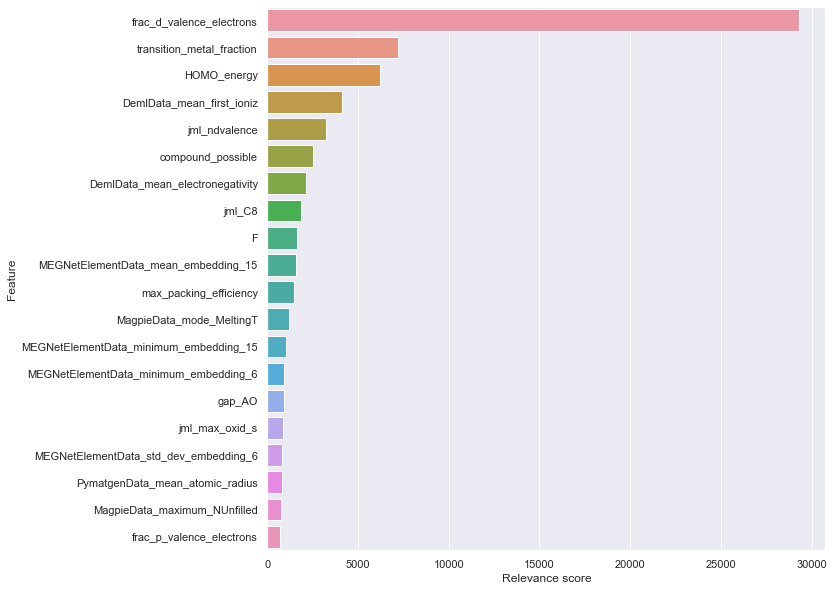

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  19128
No. of features considering:  1

n=1: mae_train=0.9305, mae_validation=0.9479 
n=1: mse_train=1.4009, mse_validation=1.4616 
n=1: rmse_train=1.1836, rmse_validation=1.2090 
n=1: r2_train=0.3859, r2_validation=0.3434 
n=1: max_error_train=12.4446, max_error_validation=13.7494 
--- 1.1490445137023926 seconds --- 

No. of features considering:  2

n=2: mae_train=0.7700, mae_validation=0.8937 
n=2: mse_train=1.0845, mse_validation=1.3412 
n=2: rmse_train=1.0414, rmse_validation=1.1581 
n=2: r2_train=0.5246, r2_validation=0.3975 
n=2: max_error_train=12.4446, max_error_validation=13.7494 
--- 0.7636940479278564 seconds --- 

No. of features considering:  3

n=3: mae_train=0.5914, mae_validation=0.7518 
n=3: mse_train=0.6950, mse_validation=1.0140 
n=3: rmse_train=0.8337, rmse_validation=1.0070 
n=3: r2_train=0.6953, r2_validation=0.5445 
n=3: max_error_train=10.6841, max_error_validation=11.9889 
--- 0.7797086238861084 seconds --- 

No. of no improveme

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,0.930468,0.947916,1.400946,1.461573,1.183616,1.208955,0.385887,0.343428,12.444616,13.749416
2,0.770019,0.893735,1.084547,1.341207,1.041416,1.158105,0.524582,0.397499,12.444640,13.749440
3,0.591403,0.751814,0.695000,1.013968,0.833667,1.006960,0.695343,0.544502,10.684096,11.988897
4,0.453575,0.647952,0.420858,0.771176,0.648736,0.878166,0.815515,0.653570,6.989456,7.658369
5,0.432135,0.629853,0.393819,0.734353,0.627550,0.856944,0.827367,0.670112,6.752079,7.868611
...,...,...,...,...,...,...,...,...,...,...
195,0.120730,0.496796,0.029836,0.455540,0.172731,0.674937,0.986921,0.795361,3.105577,8.901408
196,0.119523,0.492846,0.028342,0.458645,0.168351,0.677233,0.987576,0.793966,2.683258,9.167642
197,0.119254,0.501335,0.028139,0.472266,0.167748,0.687216,0.987665,0.787847,3.123952,9.165957


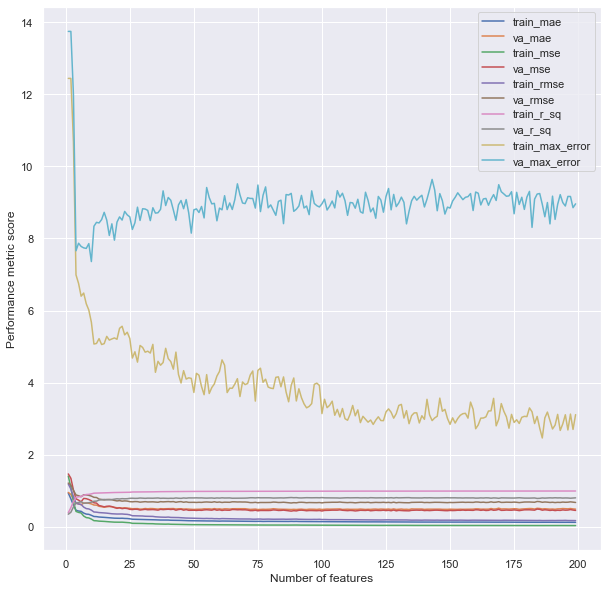

Result saved as: GBFS_convergence_plot_ΔE [eV].png


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

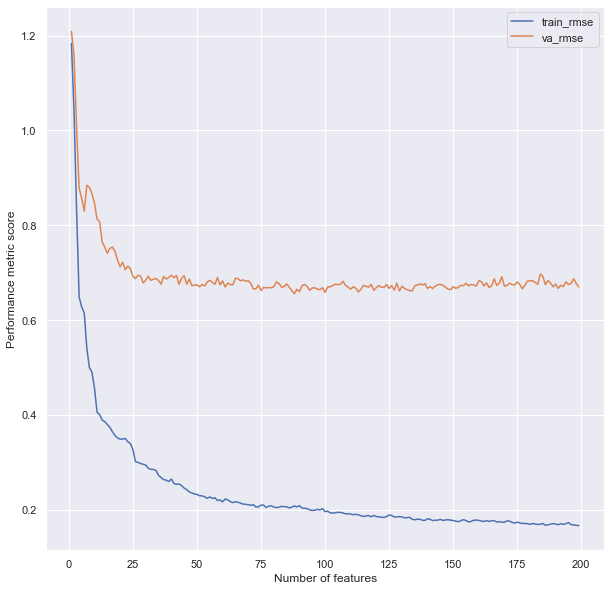

Result saved as: GBFS_convergence_plot_ΔE [eV].png


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

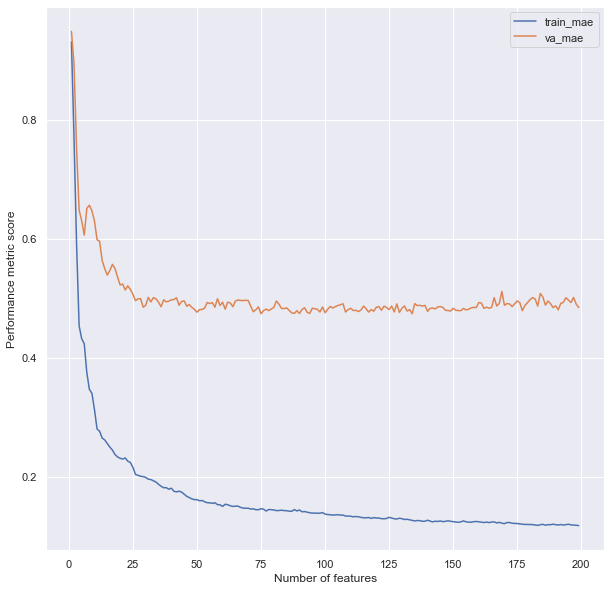

Result saved as: GBFS_convergence_plot_ΔE [eV].png


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

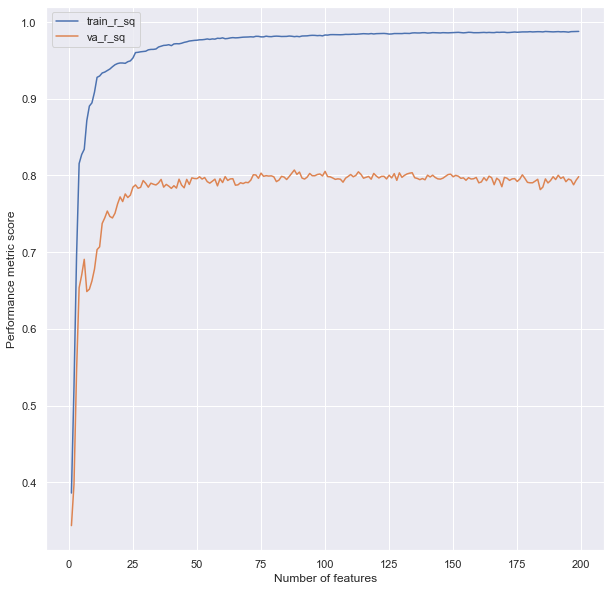

Result saved as: GBFS_convergence_plot_ΔE [eV].png


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [19]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [20]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd
import numpy as np

In [21]:
# Target
target = 'ΔE [eV]' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_v2.pkl'

problem = 'regression'

In [22]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  ΔE [eV]
No. of exploratory features:  2497


In [23]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  69
No. of exploratory features:  2428


,compound_possible,max_ionic_char,avg_ionic_char,H,He,Li,Be,B,C,N,...,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,ΔE [eV]
mp-676156,1.0,0.411090,0.367157,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.131504
mp-773515,1.0,0.392501,0.273102,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.596097
mp-761503,1.0,0.846198,0.612241,0.000000,0.0,0.115942,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.457102
mp-685168,1.0,0.831194,0.738839,0.000000,0.0,0.000000,0.555556,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.539603
mp-707327,1.0,0.860597,0.381279,0.509804,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.733297


In [24]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  180
No. of numerical features:  2248 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_ΔE [eV]_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,frac_d_valence_electrons,6381.124624,1.000000e+00
1,transition_metal_fraction,6034.839959,9.457330e-01
2,jml_C13,5283.778672,8.280325e-01
3,jml_C8,5283.778672,8.280325e-01
4,jml_C12,5170.964796,8.103532e-01
...,...,...,...
2243,jml_nn_31,0.002280,3.425579e-07
2244,MEGNetElementData_maximum_embedding_1,0.000799,1.105708e-07
2245,jml_rdf_61,0.000501,6.374339e-08
2246,La,0.000094,0.000000e+00


In [25]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  180
No. of numerical features:  2248 

Result saved as: MI_result_ΔE [eV].pkl


,feature_names,MI,MI_scaled
0,jml_first_ion_en_divi_polzbl,0.318158,1.000000
1,frac_d_valence_electrons,0.305723,0.960914
2,DemlData_minimum_molar_vol,0.293638,0.922930
3,MEGNetElementData_range_embedding_10,0.278694,0.875961
4,avg_d_valence_electrons,0.270457,0.850071
...,...,...,...
2399,HOMO_element_ohe_Hf,0.000000,0.000000
2398,HOMO_element_ohe_Ba,0.000000,0.000000
2397,HOMO_element_ohe_Ac,0.000000,0.000000
2396,Ac_fraction,0.000000,0.000000


#### Feature Engineering 

In [26]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [27]:
# Target
target = 'ΔE [eV]' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'ricci_boltztrap_mp_tabular_merged_with_NaN_v2_bandgap.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features_v2.pkl'

problem = 'regression'

In [27]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,frac_d_valence_electrons,6381.124624,1.000000
1,transition_metal_fraction,6034.839959,0.945733
2,jml_C13,5283.778672,0.828033
3,jml_C8,5283.778672,0.828033
4,jml_C12,5170.964796,0.810353


In [28]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,jml_first_ion_en_divi_polzbl,0.318158,1.000000
1,frac_d_valence_electrons,0.305723,0.960914
2,DemlData_minimum_molar_vol,0.293638,0.922930
3,MEGNetElementData_range_embedding_10,0.278694,0.875961
4,avg_d_valence_electrons,0.270457,0.850071


In [29]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,frac_d_valence_electrons,29297.225090
1,transition_metal_fraction,7229.895348
2,HOMO_energy,6187.823371
3,DemlData_mean_first_ioniz,4130.360845
4,jml_ndvalence,3225.970550


In [30]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  ΔE [eV]
No. of exploratory features:  2497


In [31]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['frac_d_valence_electrons', 'transition_metal_fraction', 'jml_C13', 'jml_C8', 'jml_C12', 'jml_first_ion_en_divi_polzbl', 'frac_d_valence_electrons', 'DemlData_minimum_molar_vol', 'MEGNetElementData_range_embedding_10', 'avg_d_valence_electrons', 'frac_d_valence_electrons', 'transition_metal_fraction', 'HOMO_energy', 'DemlData_mean_first_ioniz', 'jml_ndvalence']


In [32]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

Total number of permutation: 210
Invalid operations: 76


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,jml_ndvalence/jml_C13,jml_ndvalence/jml_C8,jml_ndvalence/jml_C12,jml_ndvalence/jml_first_ion_en_divi_polzbl,jml_ndvalence/DemlData_minimum_molar_vol,jml_ndvalence/MEGNetElementData_range_embedding_10,jml_ndvalence/avg_d_valence_electrons,jml_ndvalence/HOMO_energy,jml_ndvalence/DemlData_mean_first_ioniz,ΔE [eV]
mp-676156,0.0,0.0,0.0,0.0,1.0,0.411090,0.367157,0.0,0.0,0.0,...,1.423127,1.423127,1.605307,6.996307,1.282441,1.191005,3.422222,0.989988,1.041301,1.131504
mp-773515,0.0,0.0,0.0,0.0,1.0,0.392501,0.273102,0.0,0.0,0.0,...,0.848417,0.848417,0.877118,2.265861,1.770081,0.595759,2.196078,2.511485,0.925226,1.596097
mp-761503,0.0,0.0,0.0,0.0,1.0,0.846198,0.612241,0.0,0.0,0.0,...,0.306046,0.306046,0.324771,0.812077,0.621024,0.211399,1.437500,0.198049,0.285625,1.457102
mp-685168,0.0,0.0,0.0,0.0,1.0,0.831194,0.738839,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.539603
mp-707327,0.0,0.0,0.0,0.0,1.0,0.860597,0.381279,0.0,0.0,0.0,...,3.283818,3.283818,4.604919,1.517912,1.258144,0.851703,2.550000,0.979048,0.803381,1.733297


In [33]:
perform.save()

Result saved as: df_ΔE [eV]_engineered_features.pkl
Result saved as: features_ΔE [eV]_engineered.pkl
Result saved as: df_train_ΔE [eV]_engineered.pkl
Result saved as: df_test_ΔE [eV]_engineered.pkl


#### Multi-Collinearity Reduction

In [34]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [35]:
# Target
target = 'ΔE [eV]' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 200 # Most relevant features defined using the GBFS result

gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

200
134


334

In [36]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  ΔE [eV]
No. of exploratory features:  334


In [37]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  212
Features saved as: features_selected_from_correlation_analysis_ΔE [eV].pkl


Figure saved as: Dendrogram_ΔE [eV].png


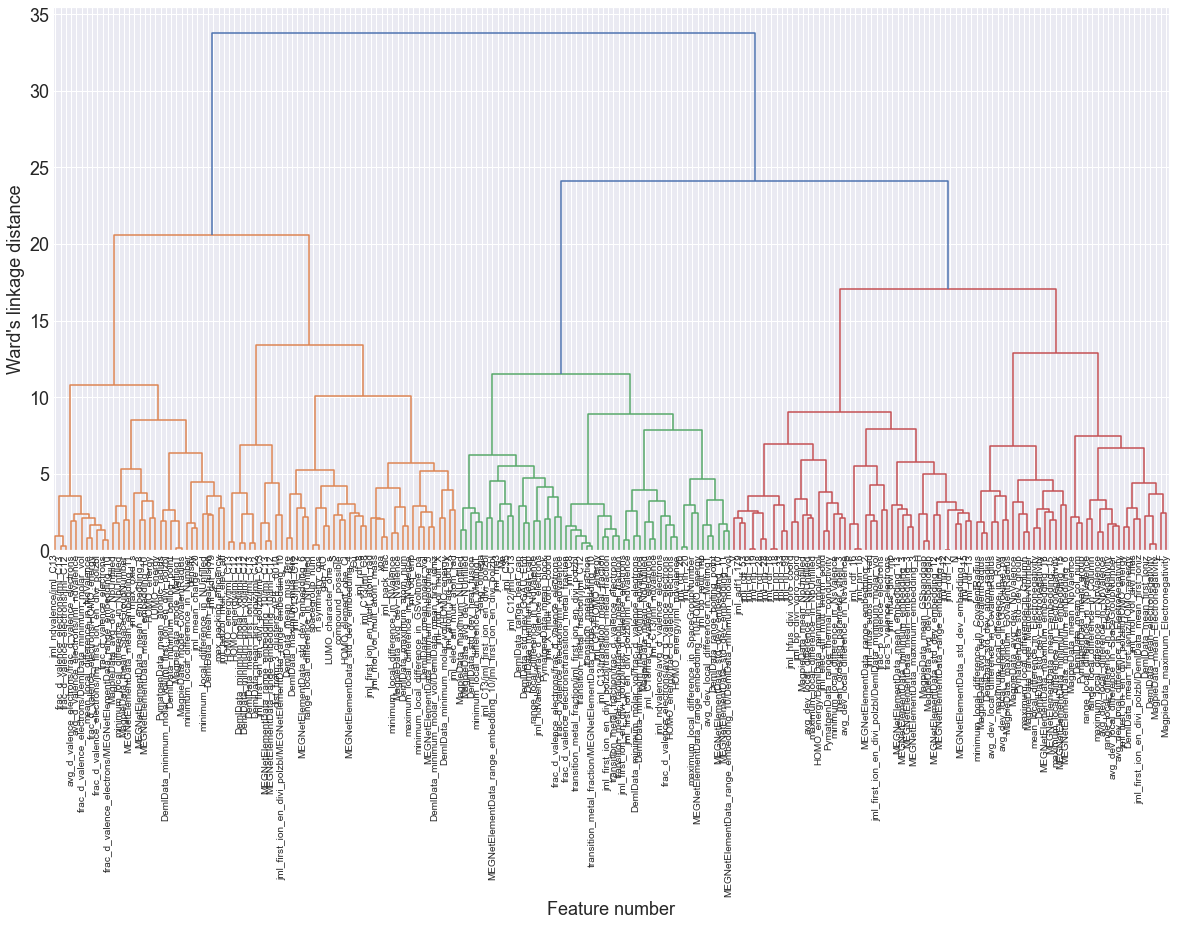

In [38]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [39]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  182
Features saved as features_selected_from_hierarchical_analysis_ΔE [eV]_threshold_1.pkl
Number of features remaining:  130
Features saved as features_selected_from_hierarchical_analysis_ΔE [eV]_threshold_2.pkl
Number of features remaining:  67
Features saved as features_selected_from_hierarchical_analysis_ΔE [eV]_threshold_3.pkl
Number of features remaining:  42
Features saved as features_selected_from_hierarchical_analysis_ΔE [eV]_threshold_4.pkl
Number of features remaining:  30
Features saved as features_selected_from_hierarchical_analysis_ΔE [eV]_threshold_5.pkl


In [40]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Recursive Feature Elimination

In [41]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [42]:
# Target
target = 'ΔE [eV]' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')

scaled = False

problem = 'regression'

In [43]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: ΔE [eV]
No. of features: 67


In [44]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 fe

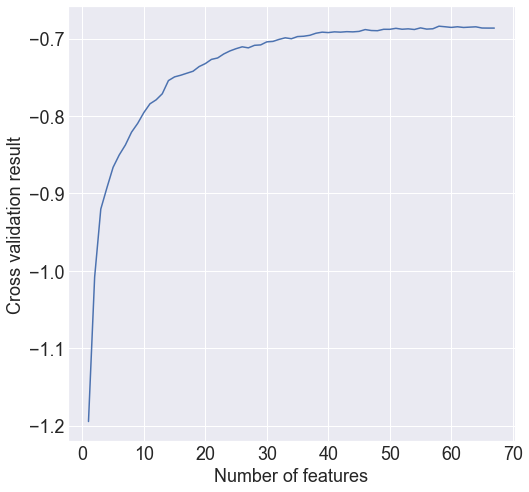

Figure saved as: RFE_plot_ΔE [eV].png


In [45]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model

In [6]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [7]:
# Target
target = 'ΔE [eV]' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 124


In [8]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [9]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [10]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [11]:
df_pred[df_pred['act_target']<0.2]

,task_id,act_target,pred_target,adj_pred_target


In [12]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 17.76669348156804
Min value: 0.20039823643697002


In [13]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 18
        min_value = 0

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.5
        ax_scatter.set_xlabel('DFT Calculation of Band Gap ($eV$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Band Gap ($eV$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 150, 300])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 175, 350])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(8.5, 11, r'$y = x$', fontdict=font1)
        ax_scatter.text(11, 9, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        xx = 12.5
        r2 = r2_score(X, Y)
        ax_scatter.text(xx, 1.55, r'$R^{2}$ = ' + str(round(r2,2)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(xx, 0.8, r'$MAE$ = ' + str(round(mae,3)) + '$eV$' , fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(xx, 0., r'$RMSE$ = ' + str(round(mse,3)) + '$eV$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 3.429e+04
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:54:21   Log-Likelihood:                -4679.3
No. Observations:                5978   AIC:                             9363.
Df Residuals:                    5976   BIC:                             9376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4112      0.013     30.834      0.0

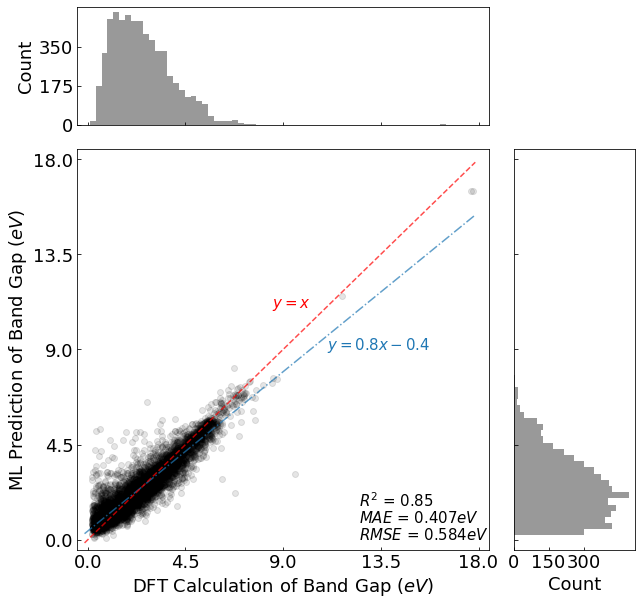

m =  0.8373364656343212
c =  0.41122909693068865 

MAE:  0.40682275105426496
MSE:  0.34083921040001
RMSE:  0.5838143629613869
R-squared:  0.8513527130575518
Max error:  6.4367735170158475
Explained_variance_score:  0.8513528167940813


In [14]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

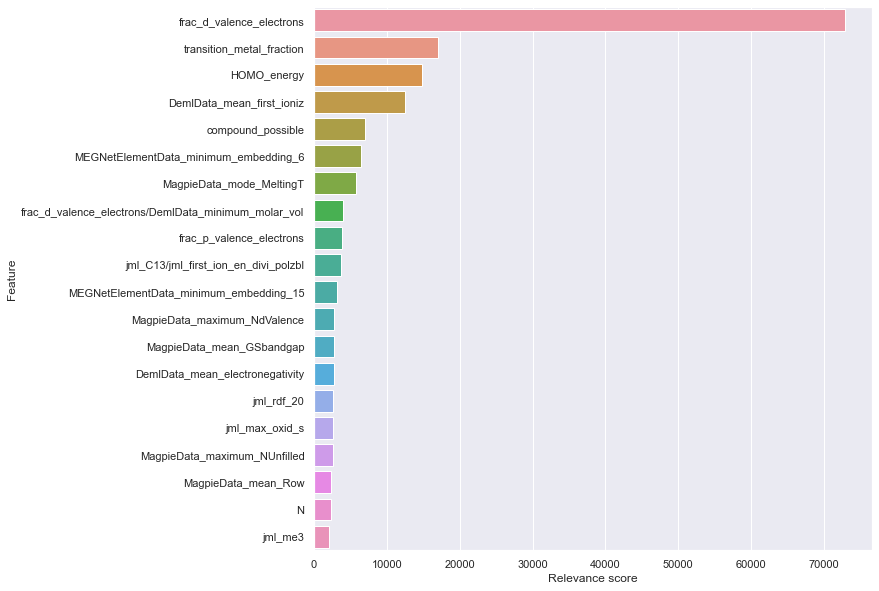

In [15]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [46]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [47]:
# Target
target = 'ΔE [eV]' 

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [48]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  ΔE [eV]
No. of exploratory features:  58


In [49]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [50]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [51]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.28543710664012645, 'n_estimators': 160, 'num_leaves': 44} 

Score:  0.6521337331727279 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.9436
Function value obtained: 0.6521
Current minimum: 0.6521
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.01419283334539953, 'n_estimators': 605, 'num_leaves': 61} 

Score:  0.6552623627258688 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.6279
Function value obtained: 0.6553
Current minimum: 0.6521
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.011574795010597261, 'n_estimators': 334, 'num_leaves': 29} 

Score:  0.7568525511956534 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.7414
Function value obtained: 0.7569
Current minimum: 0.6521
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.032

Saved: Optimisation_result_ΔE [eV].png


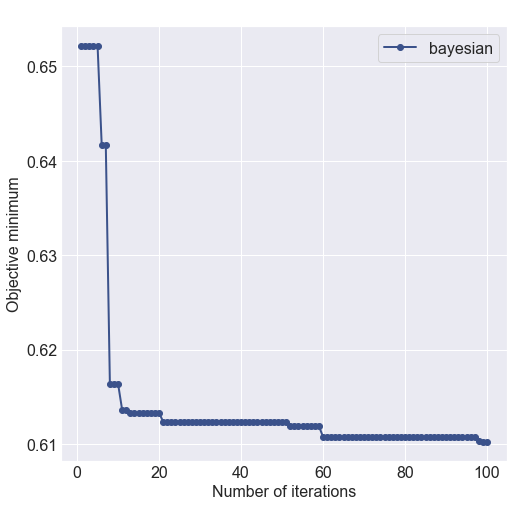

In [52]:
# Plot convergence plot
final_stage.convergence_plot()

<Figure size 720x720 with 0 Axes>

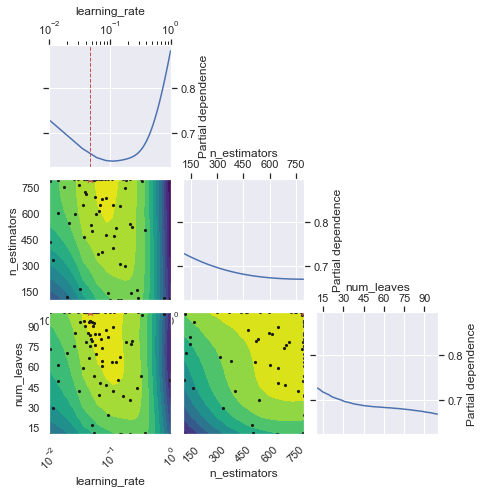

<Figure size 720x720 with 0 Axes>

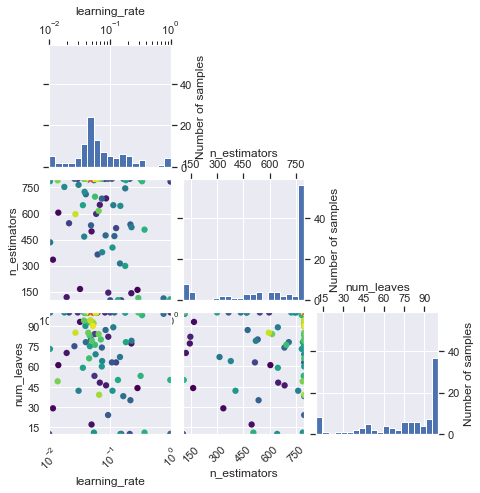

In [53]:
# objective and evaluation plot
final_stage.objective_plot()

<Figure size 720x720 with 0 Axes>

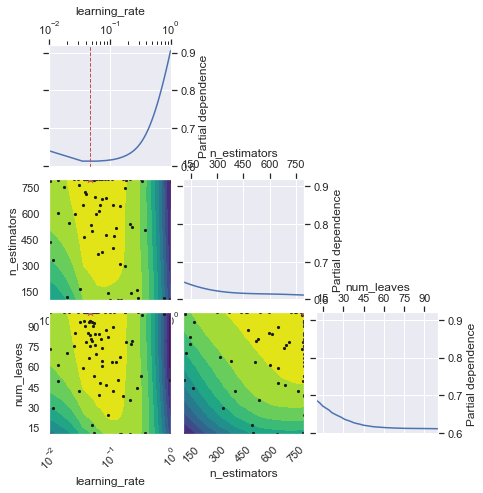

In [54]:
# objective and evaluation plot # expected_minimum_random, expected_minimum
final_stage.objective_plot_adjust(sample_source='expected_minimum', minimum='expected_minimum', n_minimum_search=2)

In [55]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.04670992624570767,
              n_estimators=800, num_leaves=100, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 2.882e+04
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:39:51   Log-Likelihood:                -3638.6
No. Observations:                4782   AIC:                             7281.
Df Residuals:                    4780   BIC:                             7294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4027      0.014     27.835      0.0

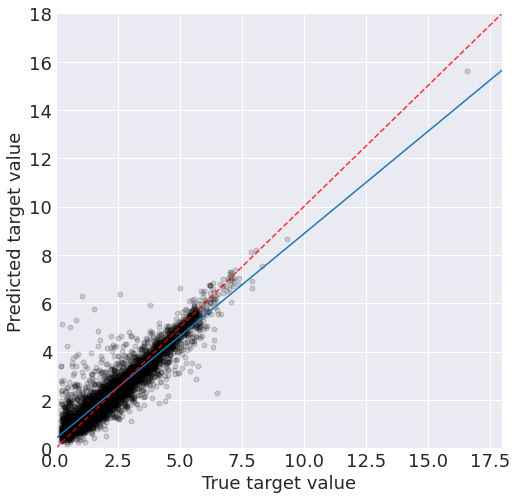

Saved: regression_plot_ΔE [eV].png


In [56]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 18,
                    min_value = 0
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'ΔE [eV]' 

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Features
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')
print(len(features))

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

58


In [3]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.04670992624570767,
                    n_estimators=800,
                    num_leaves=100,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.04670992624570767,
              n_estimators=800, num_leaves=100, objective='regression',
              random_state=42)

In [4]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [5]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 16.59750195125542
Min value: 0.20019415105802002


In [6]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 18
        min_value = 0

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10), dpi=500) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.5
        ax_scatter.set_xlabel('DFT Calculation of Band Gap ($eV$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Band Gap ($eV$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 150, 300])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 175, 350])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(8.5, 11, r'$y = x$', fontdict=font1)
        ax_scatter.text(11, 9, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        xx = 12.
        r2 = r2_score(X, Y)
        ax_scatter.text(xx, 1.55, r'$R^{2}$ = ' + str(round(r2,2)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(xx, 0.8, r'$MAE$ = ' + str(round(mae,3)) + ' $eV$' , fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(xx, 0., r'$RMSE$ = ' + str(round(mse,3)) + ' $eV$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 2.888e+04
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:38:01   Log-Likelihood:                -3628.4
No. Observations:                4782   AIC:                             7261.
Df Residuals:                    4780   BIC:                             7274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4059      0.014     28.115      0.0

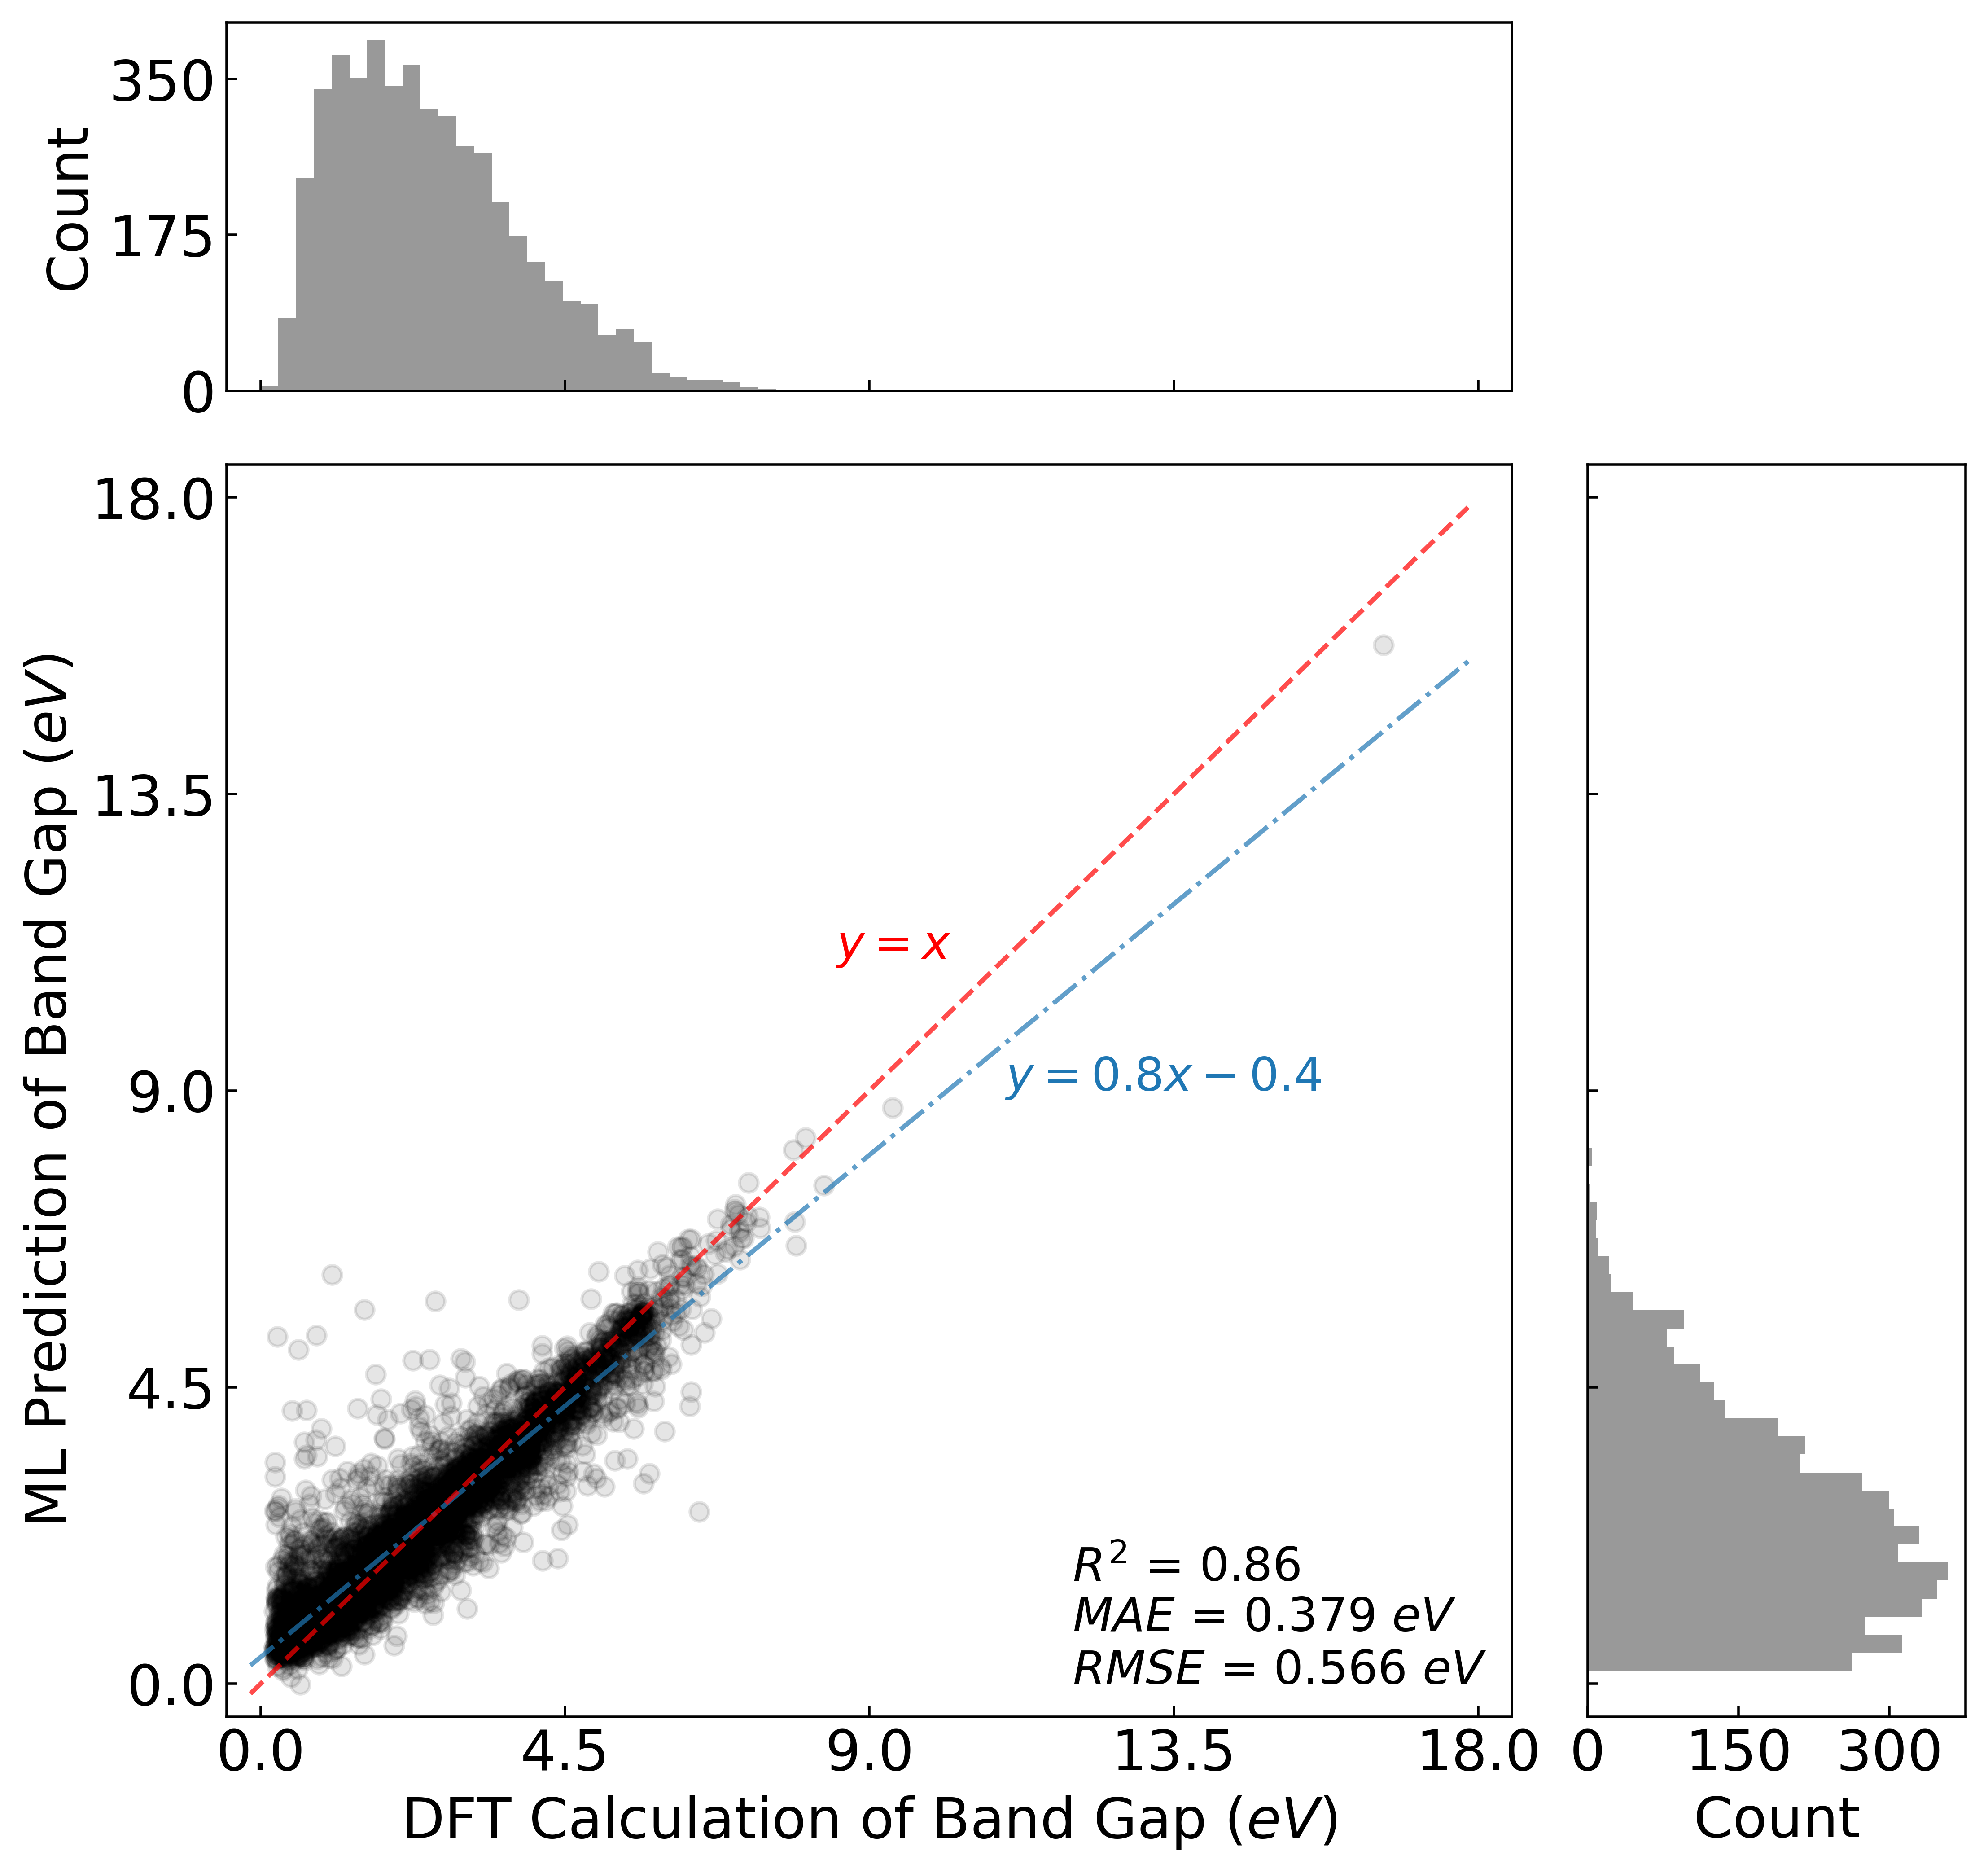

m =  0.8462661293573301
c =  0.4058837199789405 

MAE:  0.3789041767498408
MSE:  0.32089200108174176
RMSE:  0.5664733012964881
R-squared:  0.8575521175400305
Max error:  5.152381727913174
Explained_variance_score:  0.8578207324951885


In [7]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

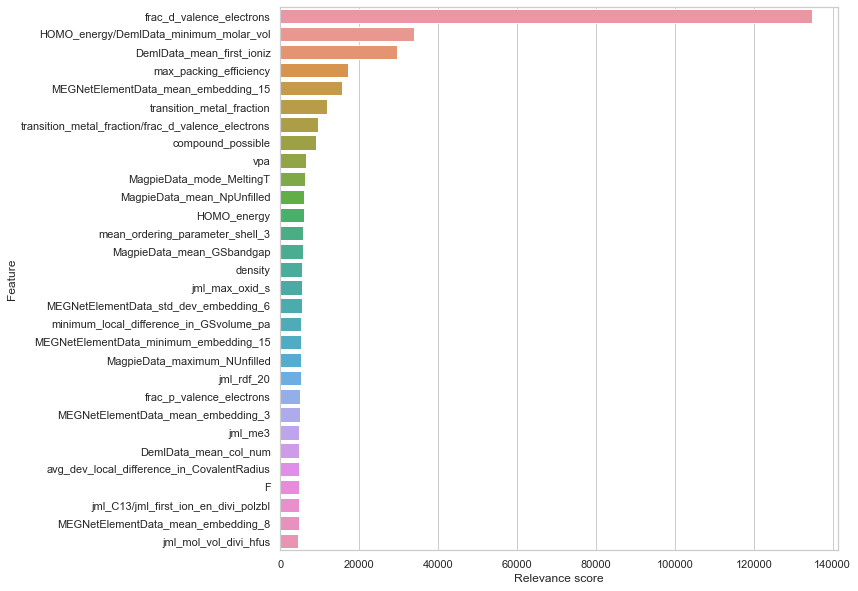

In [8]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)